In [1]:
from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py as h
from astropy.table import Table,join
from astropy.table import Table
import esutil as eu
import fitsio
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Testing consistency of the 3 SN fields 
import matplotlib.colors as mcolors
import numpy as np

In [2]:
des_deep = "/global/cscratch1/sd/aamon/DEEP/MOFcats/run-ugriz-mof02.fits"
des_deep2="/global/cscratch1/sd/aamon/DEEP/MOFcats/run-sn-JHK-ff03.fits"
deep = fitsio.read(des_deep)
deep2 = fitsio.read(des_deep2)

In [3]:
print(len(deep['bdf_mag']))
print(len(deep2['bdf_mag']))

2826988
1906261


In [20]:
# set-up
mag_lim = 26.
lowlim=18.
nbin = 31 # resolution of 2d histograms
nlevel = 3 # number of contour levels

"
des_deep = "/global/cscratch1/sd/aamon/DEEP/MOFcats/run-ugriz-mof02_extcorr.fits"
des_deep="/global/cscratch1/sd/aamon/DEEP/MOFcats/run-sn-JHK-ff03_extcorr.fits"

deep = fitsio.read(des_deep)
print(deep.dtype)
print(len(deep['bdf_mag_dered']))

print('raw length deep :', len(deep))
deep=deep[deep['flags']==0]
print('length deep post flags:', len(deep))
deep=deep[deep['mask_flags']==0]
print('length deep post mask flags:', len(deep))
print(len(deep))

ind = eu.numpy_util.strmatch(deep['tilename'], 'SN-C3*')

print(len(ind))
C3=deep[ind]
ind = eu.numpy_util.strmatch(deep['tilename'], 'SN-X3*')
X3=deep[ind]
ind = eu.numpy_util.strmatch(deep['tilename'], 'SN-E2*')
E2=deep[ind]
ind = eu.numpy_util.strmatch(deep['tilename'], 'COSMOS*')
C=deep[ind]


Xlab = 'X3'
Clab = 'C3'
Coslab = 'Cosmos'
Elab = 'E2'

print(X3['bdf_mag_dered'])

# Colour limits
ug_lim = [-1., 2.8] 
gr_lim = [-1., 2.8] 
ri_lim = [-1., 2.8] 
iz_lim = [-1., 2.8] 
zy_lim = [-1., 2.8]
yJ_lim = [-0.8, 2.0]
JH_lim = [-1., 1.8]
HK_lim = [-1., 1.8]


# form colour limits into an dictionary
col_lims = {0:ug_lim, 1:gr_lim, 2:ri_lim, 3:iz_lim } 
col_lims = { 0:JH_lim, 1:HK_lim}
# axis label dictionary
ax_labs = {0:r'$u-g$', 1:r'$g-r$', 2:r'$r-i$', 3:r'$i-z$'}
ax_labs = { 0:r'$J-H$', 1:r'$H-K$'}
# filenames
fnames = {0:'ug', 1:'gr', 2:'ri', 3:'iz'} 
fnames= { 0:'JH', 1:'HK'}



[('id', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('fof_id', '>i8'), ('fof_size', '>i4'), ('mask_flags', '>i4'), ('flags', '>i4'), ('flagstr', 'S18'), ('badpix_frac', '>f4'), ('psf_g', '>f8', (2,)), ('psf_T', '>f8'), ('psf_flux_flags', '>i4', (3,)), ('psf_flux', '>f8', (3,)), ('psf_mag', '>f8', (3,)), ('psf_flux_err', '>f8', (3,)), ('psf_flux_s2n', '>f8', (3,)), ('bdf_flags', '>i4', (3,)), ('bdf_deblend_flags', '>i4'), ('bdf_ntry', '>i2'), ('bdf_nfev', '>i4'), ('bdf_s2n', '>f8'), ('bdf_pars', '>f8', (3,)), ('bdf_pars_err', '>f8', (3,)), ('bdf_pars_cov', '>f8', (3, 3)), ('bdf_flux', '>f8', (3,)), ('bdf_mag', '>f8', (3,)), ('bdf_flux_cov', '>f8', (3, 3)), ('bdf_flux_err', '>f8', (3,)), ('gap_flux', '>f8', (3,)), ('gap_flux_err', '>f8', (3,)), ('gap_mag', '>f8', (3,)), ('tilename', 'S12'), ('EBV_SFD98', '>f8'), ('bdf_flux_dered', '>f8', (3,)), ('bdf_flux_err_dered', '>f8', (3,)), ('bdf_mag_dered', '>f8', (3,)), ('bdf_mag_err_dered', '>f8', (3,))]
1906261
raw length deep : 1906261
length deep

In [5]:
# cut to mag_lim
'''
X3 = X3[(X3['bdf_mag'][:,3]<mag_lim)&(X3['bdf_mag'][:,3]>lowlim)]
C3 = C3[(C3['bdf_mag'][:,3]<mag_lim)&(C3['bdf_mag'][:,3]>lowlim)]
E2 = E2[(E2['bdf_mag'][:,3]<mag_lim)&(E2['bdf_mag'][:,3]>lowlim)]
C = C[(C['bdf_mag'][:,3]<mag_lim)&(C['bdf_mag'][:,3]>15.)]

# cut to 'stars' or galaxies
if stars==True:
    X3 = X3[(X3['bdf_T']>-0.1)&(X3['bdf_T']<0.2)&(X3['psf_mag'][:,3]<20.)]
    C3 = C3[(C3['bdf_T']>-0.1)&(C3['bdf_T']<0.2)&(C3['psf_mag'][:,3]<20.)]
    E2 = E2[(E2['bdf_T']>-0.1)&(E2['bdf_T']<0.2)&(E2['psf_mag'][:,3]<20.)]
    C = C[(C['bdf_T']>-0.1)&(C['bdf_T']<0.2)&(C['psf_mag'][:,3]<20.)]
else:
    X3 = X3[(X3['bdf_T']>0.2)]
    C3 = C3[(C3['bdf_T']>0.2)]
    E2 = E2[(E2['bdf_T']>0.2)]
    C = C[(C['bdf_T']>0.2)]
    '''

"\nX3 = X3[(X3['bdf_mag'][:,3]<mag_lim)&(X3['bdf_mag'][:,3]>lowlim)]\nC3 = C3[(C3['bdf_mag'][:,3]<mag_lim)&(C3['bdf_mag'][:,3]>lowlim)]\nE2 = E2[(E2['bdf_mag'][:,3]<mag_lim)&(E2['bdf_mag'][:,3]>lowlim)]\nC = C[(C['bdf_mag'][:,3]<mag_lim)&(C['bdf_mag'][:,3]>15.)]\n\n# cut to 'stars' or galaxies\nif stars==True:\n    X3 = X3[(X3['bdf_T']>-0.1)&(X3['bdf_T']<0.2)&(X3['psf_mag'][:,3]<20.)]\n    C3 = C3[(C3['bdf_T']>-0.1)&(C3['bdf_T']<0.2)&(C3['psf_mag'][:,3]<20.)]\n    E2 = E2[(E2['bdf_T']>-0.1)&(E2['bdf_T']<0.2)&(E2['psf_mag'][:,3]<20.)]\n    C = C[(C['bdf_T']>-0.1)&(C['bdf_T']<0.2)&(C['psf_mag'][:,3]<20.)]\nelse:\n    X3 = X3[(X3['bdf_T']>0.2)]\n    C3 = C3[(C3['bdf_T']>0.2)]\n    E2 = E2[(E2['bdf_T']>0.2)]\n    C = C[(C['bdf_T']>0.2)]\n    "

In [32]:
# cut to mag_lim
#X3 = X3[(X3['bdf_mag'][:,3]<mag_lim)&(X3['bdf_mag'][:,3]>lowlim)]
#C3 = C3[(C3['bdf_mag'][:,3]<mag_lim)&(C3['bdf_mag'][:,3]>lowlim)]
#E2 = E2[(E2['bdf_mag'][:,3]<mag_lim)&(E2['bdf_mag'][:,3]>lowlim)]
#C = C[(C['bdf_mag'][:,3]<mag_lim)&(C['bdf_mag'][:,3]>lowlim)]

print(min(C3['bdf_mag'][:,0]), max(C3['bdf_mag'][:,0]))
X3 = X3[(X3['bdf_mag'][:,0]<mag_lim)&(X3['bdf_mag'][:,0]>lowlim)]
C3 = C3[(C3['bdf_mag'][:,0]<mag_lim)&(C3['bdf_mag'][:,0]>lowlim)]
E2 = E2[(E2['bdf_mag'][:,0]<mag_lim)&(E2['bdf_mag'][:,0]>lowlim)]
C = C[(C['bdf_mag'][:,0]<mag_lim)&(C['bdf_mag'][:,0]>lowlim)]
#Will had some star selection, but I haven't applied that 
#as we don't include these cuts in the SOM
# cut to 'stars' or galaxies

12.8871134882 37.5


'if stars==True:\n    X3 = X3[(X3[\'bdf_T\']>-0.1)&(X3[\'bdf_T\']<0.2)&(X3[\'psf_mag\'][:,3]<20.)]\n    C3 = C3[(C3[\'bdf_T\']>-0.1)&(C3[\'bdf_T\']<0.2)&(C3[\'psf_mag\'][:,3]<20.)]\n    E2 = E2[(E2[\'bdf_T\']>-0.1)&(E2[\'bdf_T\']<0.2)&(E2[\'psf_mag\'][:,3]<20.)]\n    C = C[(C[\'bdf_T\']>-0.1)&(C[\'bdf_T\']<0.2)&(C[\'psf_mag\'][:,3]<20.)]\nelse:\n    print("here")\n    X3 = X3[(X3[\'bdf_T\']>0.2)]\n    C3 = C3[(C3[\'bdf_T\']>0.2)]\n    E2 = E2[(E2[\'bdf_T\']>0.2)]\n    C = C[(C[\'bdf_T\']>0.2)]\n'

In [35]:
def shift_cen(arr):    
    return arr[:-1] + (arr[1]-arr[0])/2.

# Colour-colour plots

def col_col_contour(xcol, ycol, save_fig=False):

    # 2d hist
    x_edges = col_lims[xcol][0] + (col_lims[xcol][1] - col_lims[xcol][0]) * np.arange(nbin+1) / nbin
    y_edges = col_lims[ycol][0] + (col_lims[ycol][1] - col_lims[ycol][0]) * np.arange(nbin+1) / nbin

    if stars==True:
        z_c3 = np.histogram2d(C3['psf_mag'][:,xcol]-C3['psf_mag'][:,xcol+1], 
                        C3['psf_mag'][:,ycol]-C3['psf_mag'][:,ycol+1],
                       bins=[x_edges, y_edges], normed=True)

        z_x3 = np.histogram2d(X3['psf_mag'][:,xcol]-X3['psf_mag'][:,xcol+1], 
                        X3['psf_mag'][:,ycol]-X3['psf_mag'][:,ycol+1],
                       bins=[x_edges, y_edges], normed=True)
        
        z_e2 = np.histogram2d(E2['psf_mag'][:,xcol]-E2['psf_mag'][:,xcol+1], 
                        E2['psf_mag'][:,ycol]-E2['psf_mag'][:,ycol+1],
                       bins=[x_edges, y_edges], normed=True)
        
        z_c = np.histogram2d(C['psf_mag'][:,xcol]-C['psf_mag'][:,xcol+1], 
                        C['psf_mag'][:,ycol]-C['psf_mag'][:,ycol+1],
                       bins=[x_edges, y_edges],normed=True)
    else:
        z_c3 = np.histogram2d(C3['bdf_mag_dered'][:,xcol]-C3['bdf_mag_dered'][:,xcol+1], 
                        C3['bdf_mag_dered'][:,ycol]-C3['bdf_mag_dered'][:,ycol+1],
                       bins=[x_edges, y_edges], normed=True)

        z_x3 = np.histogram2d(X3['bdf_mag_dered'][:,xcol]-X3['bdf_mag_dered'][:,xcol+1], 
                        X3['bdf_mag_dered'][:,ycol]-X3['bdf_mag_dered'][:,ycol+1],
                       bins=[x_edges, y_edges], normed=True)
        
        z_e2 = np.histogram2d(E2['psf_mag'][:,xcol]-E2['psf_mag'][:,xcol+1], 
                        E2['psf_mag'][:,ycol]-E2['psf_mag'][:,ycol+1],
                       bins=[x_edges, y_edges], normed=True)

        z_c = np.histogram2d(C['bdf_mag_dered'][:,xcol]-C['bdf_mag_dered'][:,xcol+1], 
                        C['bdf_mag_dered'][:,ycol]-C['bdf_mag_dered'][:,ycol+1],
                       bins=[x_edges, y_edges],normed=True)
        
    # contour levels
    levels = 10.**((np.arange(nlevel+1) * (np.log10(np.max(z_c3[0])*0.95)+1) / nlevel) -1)
    X, Y = np.meshgrid(shift_cen(x_edges), shift_cen(y_edges))

    
    # plot
    fig = plt.figure(figsize=[7,6],dpi=100)
    fig.subplots_adjust(wspace=0.18, hspace=0.0,left=0.15,bottom=0.15,right=0.98,top=0.98)
    ax = fig.add_subplot(111)

    ax.set_xlabel(ax_labs[xcol], fontsize=18)
    ax.set_ylabel(ax_labs[ycol], fontsize=18)
    ax.set_xlim(col_lims[xcol])
    ax.set_ylim(col_lims[ycol])
    ax.set_title('J = %s - %s' %(lowlim, mag_lim))

    ax.contourf(X, Y, z_c[0].T, levels=levels, label=Coslab, colors='orange',alpha=0.7)
    ax.contour(X, Y, z_c3[0].T, levels=levels, label=Clab, colors='blue')
    ax.contour(X, Y, z_x3[0].T, levels=levels, label=Xlab, colors='green')
    ax.contour(X, Y, z_e2[0].T, levels=levels, label=Elab, colors='magenta')
    
    ax_ranges = [ax.get_xlim()[1]-ax.get_xlim()[0], ax.get_ylim()[1]-ax.get_ylim()[0]]
    ax_starts = [ax.get_xlim()[1]-0.15*ax_ranges[0], ax.get_ylim()[0]+0.25*ax_ranges[1]]
    #ax.quiver(ax_starts[0], ax_starts[1], ax_ranges[0]/10., -1.*ax_ranges[1]/10., scale=3.)
    
    ax.plot([ax.get_xlim()[1]+0.3*ax_ranges[0], ax.get_xlim()[1]+0.35*ax_ranges[0]], 
            [ax.get_ylim()[0]-0.3*ax_ranges[1], ax.get_ylim()[0]-0.3*ax_ranges[1]], label=Xlab, color='green')

    ax.plot([ax.get_xlim()[1]+0.3*ax_ranges[0], ax.get_xlim()[1]+0.35*ax_ranges[0]], 
            [ax.get_ylim()[0]-0.3*ax_ranges[1], ax.get_ylim()[0]-0.3*ax_ranges[1]], label=Clab, color='blue')
    ax.plot([ax.get_xlim()[1]+0.3*ax_ranges[0], ax.get_xlim()[1]+0.35*ax_ranges[0]], 
            [ax.get_ylim()[0]-0.3*ax_ranges[1], ax.get_ylim()[0]-0.3*ax_ranges[1]], label=Elab, color='magenta')
    ax.plot([ax.get_xlim()[1]+0.3*ax_ranges[0], ax.get_xlim()[1]+0.35*ax_ranges[0]], 
            [ax.get_ylim()[0]-0.3*ax_ranges[1], ax.get_ylim()[0]-0.3*ax_ranges[1]], label=Coslab, color='orange')
        

    ax.legend(loc=1)
    
    
    # save?
    if save_fig==True:
        if stars==True:
            fig.savefig('plot_stars_{}_{}_{}_{}.png'.format(Xlab, Clab, fnames[xcol], fnames[ycol]))
        else:
            fig.savefig('plot_galaxies_{}_{}_{}_{}.png'.format(Xlab, Clab, fnames[xcol], fnames[ycol]))


KeyError: 2

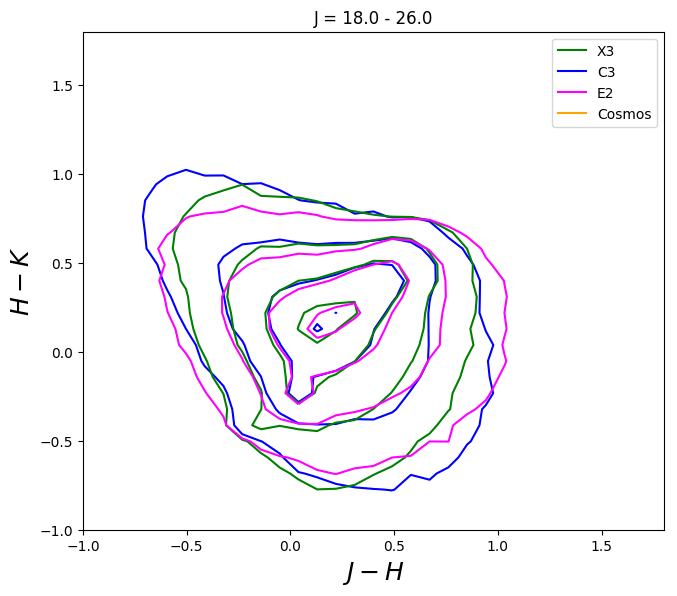

In [36]:
col_col_contour(0, 1, save_fig=True)
col_col_contour(1, 2, save_fig=True)
col_col_contour(2, 3, save_fig=True)
col_col_contour(3, 4, save_fig=True)
#col_col_contour(4, 5, save_fig=True)
##col_col_contour(5, 6, save_fig=True)
#col_col_contour(6, 7, save_fig=True)
